In [9]:
import pandas as pd


In [10]:
# Load the dataset
df = pd.read_csv(r'c:\Users\kidus\OneDrive\Documents\GitHub\Project-4\Carbon_Emission[1].csv')

In [11]:
# Print the first few rows of the DataFrame
print(df.head())



    Body Type     Sex         Diet How Often Shower Heating Energy Source  \
0  overweight  female  pescatarian            daily                  coal   
1       obese  female   vegetarian  less frequently           natural gas   
2  overweight    male     omnivore  more frequently                  wood   
3  overweight    male     omnivore      twice a day                  wood   
4       obese  female   vegetarian            daily                  coal   

      Transport Vehicle Type Social Activity  Monthly Grocery Bill  \
0        public          NaN           often                   230   
1  walk/bicycle          NaN           often                   114   
2       private       petrol           never                   138   
3  walk/bicycle          NaN       sometimes                   157   
4       private       diesel           often                   266   

  Frequency of Traveling by Air  Vehicle Monthly Distance Km Waste Bag Size  \
0                    frequently      

In [12]:
# Print the summary statistics of the DataFrame
print(df.describe())

       Monthly Grocery Bill  Vehicle Monthly Distance Km  \
count          10000.000000                 10000.000000   
mean             173.875200                  2031.485900   
std               72.234018                  2769.715597   
min               50.000000                     0.000000   
25%              111.000000                    69.000000   
50%              173.000000                   823.000000   
75%              237.000000                  2516.750000   
max              299.000000                  9999.000000   

       Waste Bag Weekly Count  How Long TV PC Daily Hour  \
count            10000.000000               10000.000000   
mean                 4.024600                  12.139200   
std                  1.990375                   7.106369   
min                  1.000000                   0.000000   
25%                  2.000000                   6.000000   
50%                  4.000000                  12.000000   
75%                  6.000000          

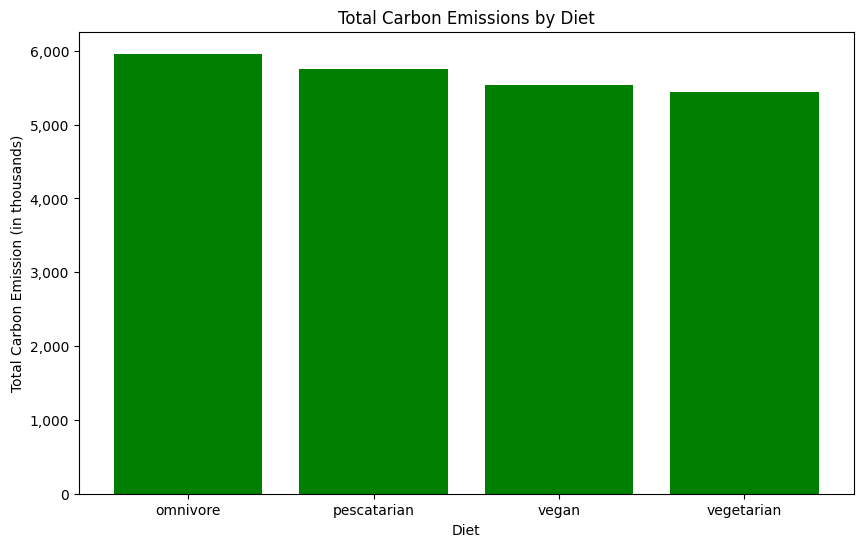

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Group the data by 'Diet' and calculate the total 'CarbonEmission' for each group
grouped = df.groupby('Diet')['CarbonEmission'].sum()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(grouped.index, grouped.values, color='green')

# Format y-axis to display in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000))
ax.yaxis.set_major_formatter(formatter)

plt.title('Total Carbon Emissions by Diet')
plt.xlabel('Diet')
plt.ylabel('Total Carbon Emission (in thousands)')
plt.show()


In [14]:
# Calculate the cutoff for the top 10%
cutoff = df['CarbonEmission'].quantile(0.9)

# Create a new DataFrame with the top 10% of records
top_10_percent_df = df[df['CarbonEmission'] > cutoff]

# Print the new DataFrame
print(top_10_percent_df)

        Body Type     Sex         Diet How Often Shower Heating Energy Source  \
4           obese  female   vegetarian            daily                  coal   
18    underweight    male        vegan  more frequently           electricity   
24     overweight    male        vegan            daily                  coal   
33         normal  female  pescatarian            daily                  wood   
55         normal    male        vegan  less frequently                  coal   
...           ...     ...          ...              ...                   ...   
9937   overweight    male     omnivore  less frequently                  coal   
9950        obese    male   vegetarian            daily                  wood   
9957  underweight    male   vegetarian            daily                  coal   
9963   overweight  female        vegan            daily           electricity   
9998  underweight    male        vegan  more frequently                  coal   

         Transport Vehicle 

In [15]:
# Assuming df is your DataFrame and the columns you listed are the ones with categorical data
categorical_columns = ['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity', 'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency', 'Recycling', 'Cooking_With']

# Convert categorical variables into numerical ones
df = pd.get_dummies(df, columns=categorical_columns)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [17]:
# Split data into inputs and target
X = df.drop(columns=['CarbonEmission'])
y = df['CarbonEmission']

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [20]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 81490.98893595001
R-squared: 0.9216212984762199


In [21]:
# Get feature importances
importances = model.feature_importances_

In [22]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, df.columns[:-1])

In [23]:

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

<Axes: >

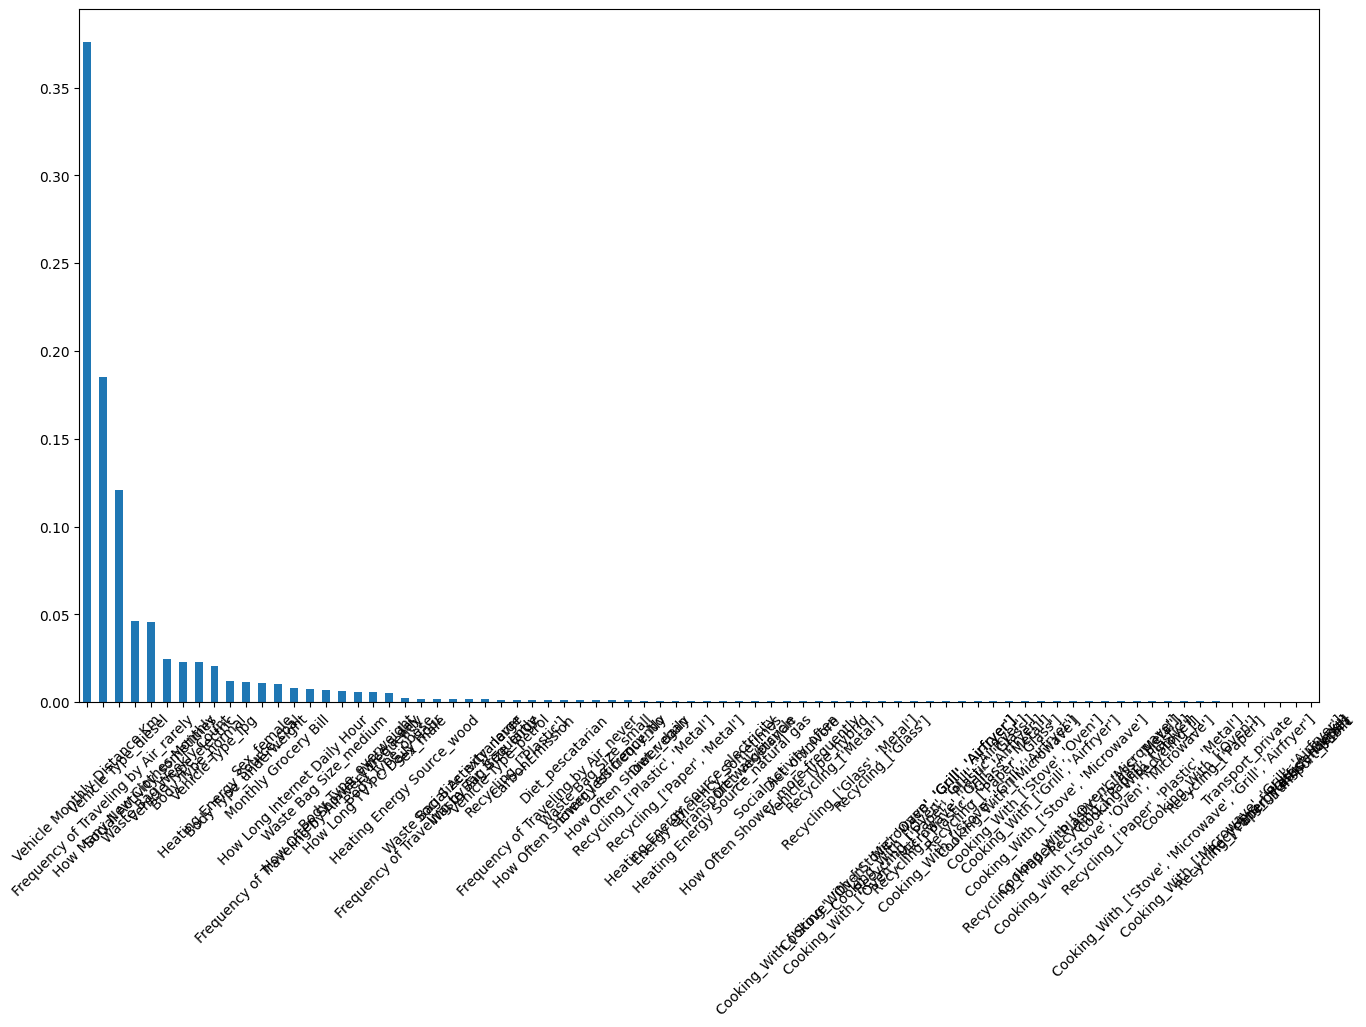

In [24]:
# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45)

In [25]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
# Convert the importances into a DataFrame
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

In [27]:
# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

In [28]:
feature_importances_df.head(10)

,Feature,Importance
1,Vehicle Monthly Distance Km,0.375831
38,Frequency of Traveling by Air_very frequently,0.184978
28,Vehicle Type_electric,0.120940
4,How Many New Clothes Monthly,0.046150
35,Frequency of Traveling by Air_frequently,0.045467
2,Waste Bag Weekly Count,0.024742
29,Vehicle Type_hybrid,0.022967
7,Body Type_obese,0.022707
31,Vehicle Type_petrol,0.020675
21,Heating Energy Source_electricity,0.011947


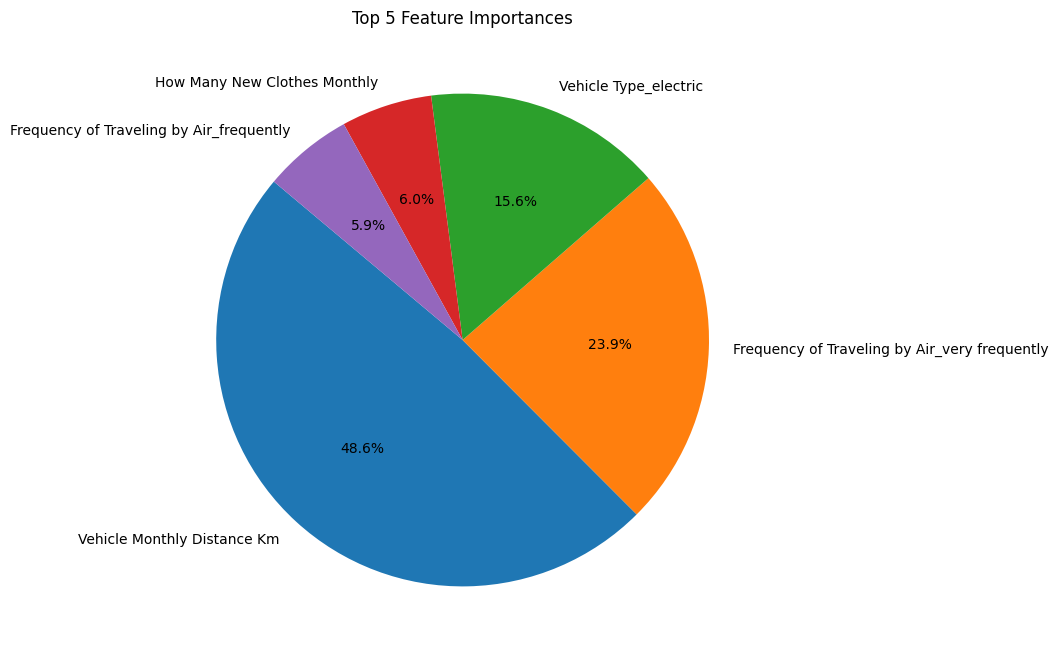

In [29]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the feature importances
top_features = feature_importances_df.nlargest(5, 'Importance')

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_features['Importance'], labels=top_features['Feature'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Feature Importances')
plt.show()


C:\Users\kidus\AppData\Local\Temp\ipykernel_37424\2792060382.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Vehicle Monthly Distance Km'].dropna(), kde=False, bins=30)


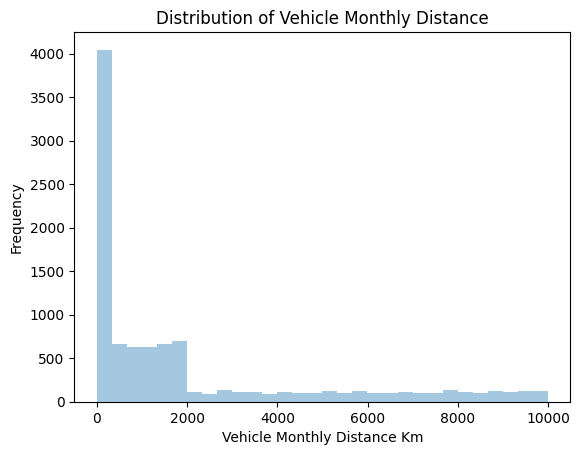

In [35]:
import seaborn as sns

sns.distplot(df['Vehicle Monthly Distance Km'].dropna(), kde=False, bins=30)
plt.title('Distribution of Vehicle Monthly Distance')
plt.xlabel('Vehicle Monthly Distance Km')
plt.ylabel('Frequency')
plt.show()


In [43]:

# Step 1: Calculate the quantiles
quantile_25 = df['CarbonEmission'].quantile(0.25)
quantile_75 = df['CarbonEmission'].quantile(0.75)

# Step 2: Define a function to classify each person's carbon emission status
def classify_emission(emission):
    if emission <= quantile_25:
        return 'Good'
    elif emission >= quantile_75:
        return 'Bad'
    else:
        return 'Average'

# Apply the function to the 'CarbonEmission' column to create a new 'EmissionStatus' column
df['EmissionStatus'] = df['CarbonEmission'].apply(classify_emission)

# Now 'df' includes a new column 'EmissionStatus' with the classification based on carbon emission

df 


,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,Body Type_overweight,...,"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[],EmissionStatus
0,230,210,4,7,26,1,2238,False,False,True,...,False,False,False,False,False,False,True,False,False,Average
1,114,9,3,9,38,5,1892,False,True,False,...,False,False,True,False,False,False,False,False,False,Average
2,138,2472,1,14,47,6,2595,False,False,True,...,False,False,False,False,False,False,False,False,False,Average
3,157,74,3,20,5,7,1074,False,False,True,...,False,False,False,False,False,False,False,False,False,Good
4,266,8457,1,3,5,6,4743,False,True,False,...,False,False,False,False,False,False,False,False,False,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,230,268,5,12,27,9,2408,False,True,False,...,False,False,False,False,False,False,False,False,False,Average
9996,234,5316,3,14,8,24,3084,True,False,False,...,False,False,True,False,False,False,False,False,False,Bad
9997,298,96,5,11,5,24,2377,False,False,True,...,False,False,False,False,False,False,False,False,False,Average
9998,179,8688,5,19,14,5,4574,False,False,False,...,False,True,False,False,False,False,False,False,False,Bad
